In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import talib
import yfinance as yf

In [2]:
nasdaq_ticker = "^IXIC"  # NASDAQ index ticker symbol
nse_ticker = "^NSEI"  # NSE index ticker symbol

start_date = "2010-01-01"
end_date = "2023-06-01"

# Collect historical data for NASDAQ index
nasdaq_data = yf.download(nasdaq_ticker, start=start_date, end=end_date)['Close']

# Collect historical data for NSE index
nse_data = yf.download(nse_ticker, start=start_date, end=end_date)['Close']

#print(nasdaq_data.head())
#nse_data.head()

columns = nasdaq_data.index
print(columns)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', name='Date', length=3375, freq=None)


In [3]:
correlation_coefficient = nasdaq_data.corr(nse_data)

In [4]:
if correlation_coefficient > 0:
    strength = "positive"
elif correlation_coefficient < 0:
    strength = "negative"
else:
    strength = "neutral"

# Print the correlation coefficient and the strength of the relationship
print("Correlation Coefficient: ", correlation_coefficient)
print("Strength of the Relationship: ", strength)

Correlation Coefficient:  0.9511577006729948
Strength of the Relationship:  positive


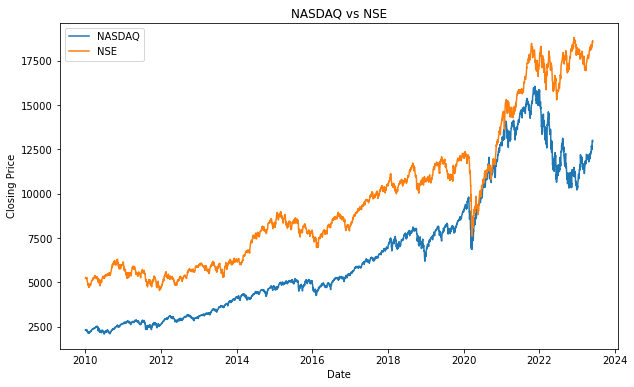

In [5]:
#nasdaq_data.index = pd.to_datetime(nasdaq_data.index)
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_data.index, nasdaq_data.values, label='NASDAQ')
plt.plot(nse_data.index, nse_data.values, label='NSE')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NASDAQ vs NSE')
plt.legend()
plt.show()

In [6]:
from scipy.signal import correlate

# Normalize the indices data
normalized_nasdaq = (nasdaq_data - nasdaq_data.mean()) / nasdaq_data.std()
normalized_nse = (nse_data - nse_data.mean()) / nse_data.std()

# Calculate cross-correlation
cross_corr = correlate(normalized_nasdaq, normalized_nse, mode='full')

# Find the lag with the highest correlation
lead_lag = np.argmax(cross_corr) - (len(nasdaq_data) - 1)

if lead_lag > 0:
    print("NASDAQ leads NSE by", lead_lag, "days.")
elif lead_lag < 0:
    print("NSE leads NASDAQ by", -lead_lag, "days.")
else:
    print("NASDAQ and NSE are synchronized.")

NSE leads NASDAQ by 70 days.


In [12]:
import ta

#will use NSE

data = nse_data

# Calculate Keltner Channel
keltner_channel = ta.trend.keltner_channel(high=data['High'], low=data['Low'], close=data['Close'])
data['keltner_middle'] = keltner_channel['mid']
data['keltner_upper'] = keltner_channel['high']
data['keltner_lower'] = keltner_channel['low']

# Calculate Bollinger Bands
bollinger_bands = ta.volatility.bollinger_hband(close=data['Close'])
data['bollinger_middle'] = bollinger_bands['mid']
data['bollinger_upper'] = bollinger_bands['high']
data['bollinger_lower'] = bollinger_bands['low']

# Calculate MACD
macd = ta.trend.macd(close=data['Close'])
data['macd'] = macd['macd']
data['macd_signal'] = macd['macd_signal']
data['macd_histogram'] = macd['macd_diff']

# Plotting the indicators
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['keltner_middle'], label='Keltner Middle')
plt.plot(data.index, data['keltner_upper'], label='Keltner Upper')
plt.plot(data.index, data['keltner_lower'], label='Keltner Lower')
plt.plot(data.index, data['bollinger_middle'], label='Bollinger Middle')
plt.plot(data.index, data['bollinger_upper'], label='Bollinger Upper')
plt.plot(data.index, data['bollinger_lower'], label='Bollinger Lower')
plt.xlabel('Date')
plt.title('Indicators')
plt.legend()
plt.grid(True)
plt.show()







AttributeError: module 'ta.trend' has no attribute 'keltner_channel'

In [17]:
# Calculate Exponential Moving Average (EMA)
ema_period = 20

df = pd.DataFrame(data)

data['ema'] = df.values.ewm(span=ema_period, adjust=False).mean()

AttributeError: 'numpy.ndarray' object has no attribute 'ewm'